In [8]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## The Two-Sample z-test

Last month, the President's approval rating in sample of 1,000 likely voters was 55%. This month, a poll of 1,500 likely voters resulted in a rating of 58%. Is this sufficient evidence to conclude that the rating has changed?

We want to assess whether

$p_1$ = proportion of all likely voters approving last month<br> is equal to<br> $p_2$ = proportion of all likely voters approving this month.<br>
"nothing unusual is going on" mean $p_1=p_2$. It's common to look at the difference $p2-p1$ instead:

$H_0: p_2 - p_1 = 0 ~~~~~~~~ H_1: p_2 - p_1 \neq 0$

$p_1$ is estimated by $\hat{p}_1 = 55 \%$, $p_2$ by $\hat{p}_2 = 58 \%$. The central limit theorem applies to the difference $\hat{p}_2 - \hat{p}_1$ just as it does to $\hat{p}_1$ and $\hat{p}_2$. So we can use a z-test:

$z = \frac{{obersrved~difference} - {expected~difference}}{{SE~of~difference}} = \frac{{(\hat{p}_2 - \hat{p}_1)} - {(p_2 - p_1)}}{{SE~of~difference}}$

but $(p_2 - p_1) = 0$ <br>

An important fact is that if $\hat{p}_2$ and $\hat{p}_1$ are independent, then

$$SE(\hat{p}_2 - \hat{p}_1) = \sqrt{(SE(\hat{p}_1)^2)+ (SE(\hat{p}_2)^2)}$$

So $$z = \frac{(\hat{p}_2 - \hat{p}_1) - 0}{\sqrt{\sqrt{\frac{p_1(1-p1)^2}{1000}} + \sqrt{\frac{p_2(1-p2)^2}{1500}}}} = \frac{0.03}{0.0202} = 1.48$$

p-value is 13,74% cannot be rejected


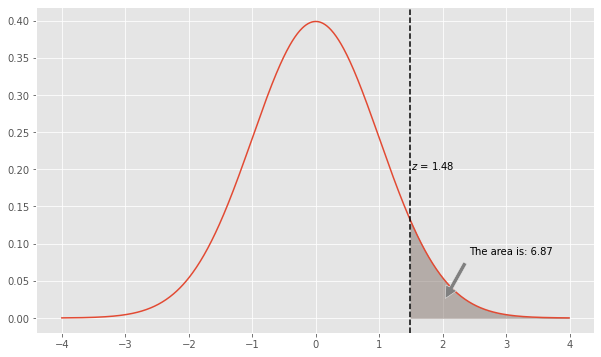

In [43]:

mu = 0
variance = 1
sigma = math.sqrt(variance)

# Create the curve from -4σ to 4σ
x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax = sns.lineplot(x=x, y=y)
kde_x, kde_y = ax.lines[0].get_data()

# The number os standard deviations to plot

a_1 = (1.48)
ax.axvline(a_1, color = 'k', linestyle="--")
ax.annotate(f'$z$ = 1.48', xy=(1.50, 0.2))

area_whitin = y[(x>1.48)].sum()
area_whitin


ax.annotate(f"The area is: {area_whitin:0.2f}", xy=(2, 0.02),  xycoords='data',
            xytext=(0.85, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center')

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > a_1), 
interpolate=True, color='#85756d', alpha=0.50)

The confidence interval for $p_2 - p_1$ is 

($\hat{p}_2 - \hat{p}_1) \pm zSE(\hat{p}_2 - \hat{p}_1) = [-1\%, 7\%]$ when $z=2~$ ($95\%$ confidence)

We can improve the estimate of SE($\hat{p_2} - \hat{p_1}$) somewhat by using the fact that $p_1 = p_2$ on $H_0$. Since there is a common proportion we can estimate it by **pooling** the samples:

$0.55 \times 1000 = 550$ voters approve in the first sample, 870 in the second, so in total there are 1420 approvals out of 2500. So the **pooled estimate** of $p_1 = p_2$ is $\frac{1420}{2500} = 56.8\%$

So we estimate $SE(\hat{p}_2 - \hat{p}_1)$ by $\sqrt{\frac{0.568(1-0.568)}{1000} + \frac{0.568(1-0.568)}{1500}} = 0.02022$, which essentially gives the same answer in this case.

The two-sample z-test is applicable in the same way to the difference of two sample means in order to test for equality of two population means.

$$SE(\bar{x}_2 - \bar{x}_1) = \sqrt{(SE(\bar{x}_1)^2) + (SE(\bar{x}_2)^2)}$$

and $SE(\bar{x}_1) = \frac{\sigma}{\sqrt{n_1}}$ is estimated by $\frac{s_1}{\sqrt{n_1}}$.

If the sample sizes $n_1$, $n_2$ are not larger, then the p-value needs to be computed from the t-distribution.

If one has reason to assume that $\sigma_1 = \sigma_2 $ (or if this has been checked), then one may use the **pooled estimate** for $\sigma_1 = \sigma_2$ given by

$$s^2_{pooled} = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1+n_2-2}$$

However, the advantage os using $s^2_{pooled}$ are small and the analysis rests on the assumption that $\sigma_1 = \sigma_2$. For these reasons the pooled t-test is usually avoided. All of the above two-sample tests require that the two samples are independent. They are also applicable in special situations where the samples are dependent, e.g. to compare the treatmennt effect when subjects are randomized into treatment and control groups.